/var/folders/w_/tlx3kfln2s9btjy8l26bm8dw0000gn/T/ipykernel_2785/1317383066.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(
/var/folders/w_/tlx3kfln2s9btjy8l26bm8dw0000gn/T/ipykernel_2785/1317383066.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(
/var/folders/w_/tlx3kfln2s9btjy8l26bm8dw0000gn/T/ipykernel_2785/1317383066.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(


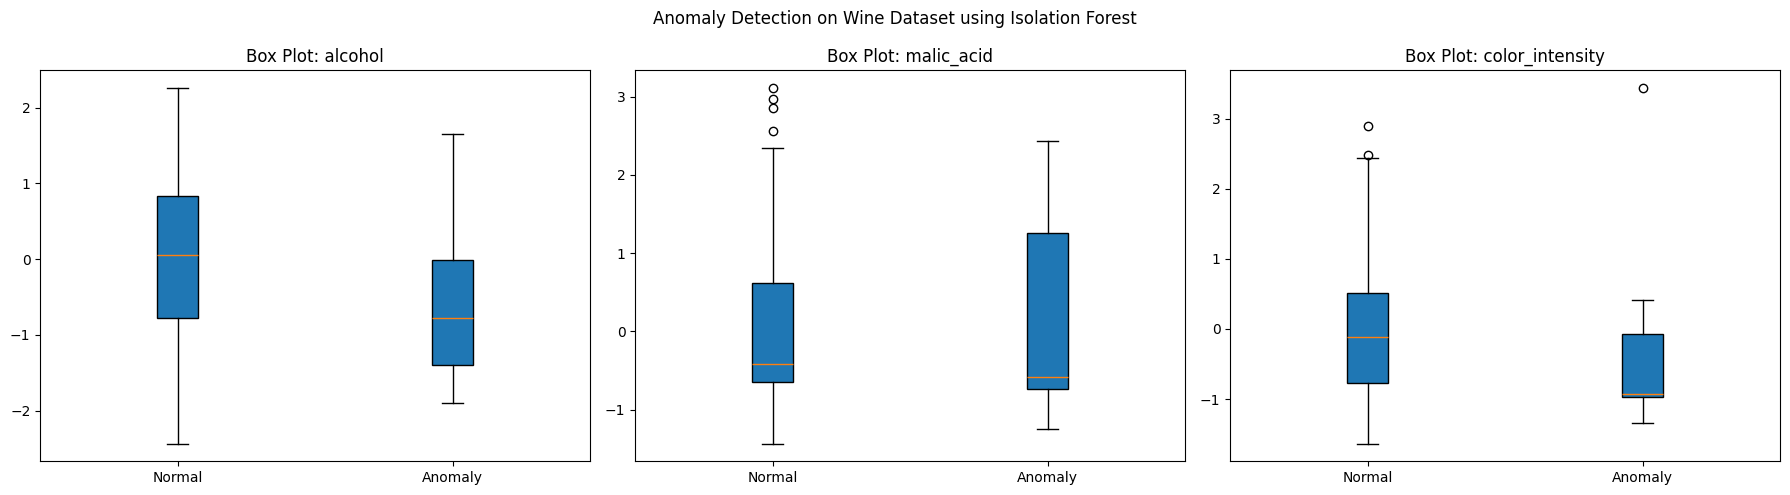

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
X_scaled['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Convert anomaly labels: -1 = Anomaly, 1 = Normal
X_scaled['Anomaly'] = X_scaled['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Box plot of selected features to compare Normal vs Anomalies
selected_features = ['alcohol', 'malic_acid', 'color_intensity']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(selected_features):
    axes[i].set_title(f"Box Plot: {feature}")
    axes[i].boxplot(
        [X_scaled[X_scaled['Anomaly'] == 'Normal'][feature],
         X_scaled[X_scaled['Anomaly'] == 'Anomaly'][feature]],
        labels=['Normal', 'Anomaly'],
        patch_artist=True
    )

plt.suptitle("Anomaly Detection on Wine Dataset using Isolation Forest")
plt.tight_layout()
plt.show()
